# WGU D209: Data Mining I
## Task 2: Predctive Analysis

### Data Acquisition

In [1]:
# Import the standard libraries.

import sys
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt
import pydotplus
import graphviz
from IPython.display import Image
from PIL import Image as bmp
import six
sys.modules['sklearn.externals.six'] = six

# Import plotDecisionTree
from dmba import plotDecisionTree, classificationSummary

no display found. Using non-interactive Agg backend


In [2]:
# Import Scikit-learn.

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz as dt # decisiontree

#### Disabling the scrollbars in Jupyter Notebook and automatic scroll to the bottom.

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<IPython.core.display.Javascript object>

In [5]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [6]:
# Load the CSV file.
df = pd.read_csv('/Users/jillrivera/Documents/WGU/209 Data Mining I/Churn/churn_clean.csv')
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [7]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [8]:
df.shape

(10000, 50)

### Data Cleaning

In [9]:
# Dropping irrelevant data.
df = df.drop(columns = ['CaseOrder', 'UID', 'Customer_id', 'Interaction', 'City', 'State', 'County', 'Zip',
                       'Lat', 'Lng', 'Job', 'TimeZone', 'Population'])
df.shape

(10000, 37)

In [10]:
# Show the variables to be analyzed.

for c in df.loc[:, df.columns]:
    if df.dtypes[c] == "object":
        print('\n{} is categorical: {}.'.format(c,df[c].unique()))
    else:
        print('\n{} is numerical:'.format(c ))
        print('\trange = {} - {}'.format(df[c].min(),df[c].max()))
        print('\tmean = {:.2f} +/- {:.2f}'.format(df[c].mean(), df[c].std()))


Area is categorical: ['Urban' 'Suburban' 'Rural'].

Children is numerical:
	range = 0 - 10
	mean = 2.09 +/- 2.15

Age is numerical:
	range = 18 - 89
	mean = 53.08 +/- 20.70

Income is numerical:
	range = 348.67 - 258900.7
	mean = 39806.93 +/- 28199.92

Marital is categorical: ['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced'].

Gender is categorical: ['Male' 'Female' 'Nonbinary'].

Churn is categorical: ['No' 'Yes'].

Outage_sec_perweek is numerical:
	range = 0.09974694 - 21.20723
	mean = 10.00 +/- 2.98

Email is numerical:
	range = 1 - 23
	mean = 12.02 +/- 3.03

Contacts is numerical:
	range = 0 - 7
	mean = 0.99 +/- 0.99

Yearly_equip_failure is numerical:
	range = 0 - 6
	mean = 0.40 +/- 0.64

Techie is categorical: ['No' 'Yes'].

Contract is categorical: ['One year' 'Month-to-month' 'Two Year'].

Port_modem is categorical: ['Yes' 'No'].

Tablet is categorical: ['Yes' 'No'].

InternetService is categorical: ['Fiber Optic' 'DSL' 'None'].

Phone is categorical: ['Yes' 'No'].


In [11]:
# Check for null values.
df.isnull().sum()

Area                    0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
Item1                   0
Item2                   0
Item3                   0
Item4                   0
Item5                   0
Item6                   0
Item7                   0
Item8                   0
dtype: int64

In [12]:
# Check for duplicated rows.
df.duplicated().any()

False

In [13]:
# Check for outlying values in the numerical data using z-score.

raw_numerical = df.select_dtypes(exclude = 'object')
z_scores = stats.zscore(raw_numerical)
abs_z_scores = np.abs(z_scores)
filtered_scores = (abs_z_scores < 3).all(axis = 1)
raw_wo_outliers = df[filtered_scores]
raw_wo_outliers.shape

(9291, 37)

In [14]:
# Rename the clean data set.
clean = raw_wo_outliers.copy()
clean.head()

,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,Urban,0,68,28561.99,Widowed,Male,No,7.978323,10,0,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,Urban,1,27,21704.77,Married,Female,Yes,11.699080,12,0,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,Urban,4,50,9609.57,Widowed,Female,No,10.752800,9,0,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,Suburban,1,48,18925.23,Married,Male,No,14.913540,15,2,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,Suburban,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,...,149.948316,271.493436,4,4,4,3,4,4,4,5


### Data Exploration

In [15]:
# Variable statistics of the numerical data.
clean.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000,9291.000000
mean,1.942956,53.050802,38300.237547,10.012702,12.028845,0.940157,0.373695,34.484503,172.719055,3384.786384,3.474007,3.492412,3.475406,3.493381,3.493919,3.484447,3.498009,3.483371
std,1.897303,20.656413,25078.121275,2.927481,3.006671,0.898553,0.581240,26.448396,42.974055,2185.799352,1.016149,1.021102,1.015548,1.020160,1.014768,1.020906,1.019335,1.017933
min,0.000000,18.000000,348.670000,1.144796,3.000000,0.000000,0.000000,1.005104,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,35.000000,19034.290000,8.036331,10.000000,0.000000,0.000000,7.897041,139.979200,1229.604769,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,53.000000,32765.970000,10.022980,12.000000,1.000000,0.000000,32.976930,169.937800,3249.417944,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,71.000000,52274.855000,11.975030,14.000000,2.000000,1.000000,61.431790,202.443300,5581.373212,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,8.000000,89.000000,124025.100000,18.851730,21.000000,3.000000,2.000000,71.999280,290.160419,7158.981530,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [16]:
# Define the target and features.
target = 'Churn'
X = clean.drop(columns=[target])
y = clean[target]
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [17]:
# Define the categorical features.
cat_features = X.select_dtypes(include=['object']).columns
print(cat_features)

Index(['Area', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [18]:
# Define the numerical features.
num_features = X.select_dtypes(exclude=['object']).columns
print(num_features)

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')


### Data Wrangling

In [19]:
# Convert categorical features.

from sklearn.preprocessing import LabelEncoder
categorical_feature_names = []
label_encoders = {}
for categorical in cat_features:
    label_encoders[categorical] = LabelEncoder()
    clean[categorical] = label_encoders[categorical].fit_transform(clean[categorical])
    names = label_encoders[categorical].classes_.tolist()
    print('Label encoder %s - values: %s' % (categorical, names))
    if categorical == target:
        continue
    categorical_feature_names.extend([categorical + '_' + str(name) for name in names])

Label encoder Area - values: ['Rural', 'Suburban', 'Urban']
Label encoder Marital - values: ['Divorced', 'Married', 'Never Married', 'Separated', 'Widowed']
Label encoder Gender - values: ['Female', 'Male', 'Nonbinary']
Label encoder Techie - values: ['No', 'Yes']
Label encoder Contract - values: ['Month-to-month', 'One year', 'Two Year']
Label encoder Port_modem - values: ['No', 'Yes']
Label encoder Tablet - values: ['No', 'Yes']
Label encoder InternetService - values: ['DSL', 'Fiber Optic', 'None']
Label encoder Phone - values: ['No', 'Yes']
Label encoder Multiple - values: ['No', 'Yes']
Label encoder OnlineSecurity - values: ['No', 'Yes']
Label encoder OnlineBackup - values: ['No', 'Yes']
Label encoder DeviceProtection - values: ['No', 'Yes']
Label encoder TechSupport - values: ['No', 'Yes']
Label encoder StreamingTV - values: ['No', 'Yes']
Label encoder StreamingMovies - values: ['No', 'Yes']
Label encoder PaperlessBilling - values: ['No', 'Yes']
Label encoder PaymentMethod - value

In [20]:
# View categorial features after transformation.
print(categorical_feature_names)
print(label_encoders)

['Area_Rural', 'Area_Suburban', 'Area_Urban', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Female', 'Gender_Male', 'Gender_Nonbinary', 'Techie_No', 'Techie_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two Year', 'Port_modem_No', 'Port_modem_Yes', 'Tablet_No', 'Tablet_Yes', 'InternetService_DSL', 'InternetService_Fiber Optic', 'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No', 'Multiple_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank Transfer(automatic)', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check']
{'Area': LabelEncoder(), 'Marital': LabelEncoder(), 'Gender': La

### Export Data

In [21]:
# Export the cleaned data set to a CSV file. 
clean.to_csv('209clean_task2.csv')

### Analysis

#### Training and testing split of the data.

In [22]:
# Define the primary features and target variable.

target= 'Churn' 
X = clean.loc[:, clean.columns != target]
y = clean.loc[:, clean.columns == target]

In [23]:
# Train / test split the raw data.

tts = train_test_split(X, y, test_size=0.3, random_state=13)
(X_train, X_test, y_train, y_test)=tts
print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))

X_train: (6503, 36)
y_train: (6503, 1)
X_test: (2788, 36)
y_test: (2788, 1)


In [24]:
# Label the training data and export a copy to a CSV file.

trainData = X_train.merge(y_train, 
        left_index=True, right_index=True)
trainData.to_csv('209trainData_task2.csv')

In [25]:
# Label the test data and export a copy to a CSV file.

testData = X_test.merge(y_test, 
        left_index=True, right_index=True)
testData.to_csv('209testData_task2.csv')

#### Predictive Analysis

In [26]:
# Model Creation
dt = DecisionTreeClassifier(max_depth=2, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

Target: [Churn: No, Yes]


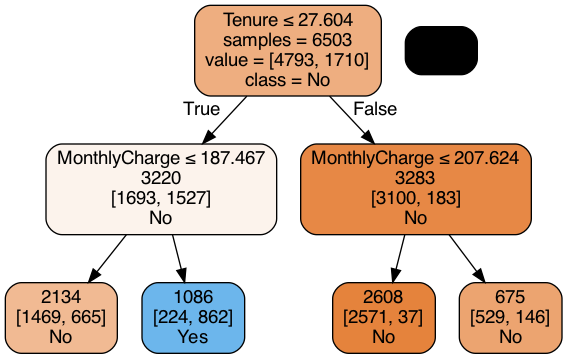

In [27]:
# Classification Tree
print('Target: [{}: {}]'.format(target, ', '.join(dt.classes_)))
plotDecisionTree(dt, feature_names=X_train.columns.to_list(),
            class_names=dt.classes_)

In [28]:
# Plot the decision boundaries.
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)

# Define the plot variables.
x = 'Tenure'
y='MonthlyCharge'
title = 'Decision Boundaries'

sns.scatterplot(x=x, y=y,
    palette=['darkorange','blue'], hue=target,
    data=y_train.merge(X_train, left_index=True, right_index=True))
ax.axvline(x=27.659)
ax.hlines(y=174.977, xmin=-1, xmax=27.659) # horizontal line segment
ax.hlines(y=207.624, xmin=27.659, xmax=74) # horizontal line segment

ax.set_title(title.upper(), fontsize=16)

Text(0.5, 1.0, 'DECISION BOUNDARIES')

In [29]:
# Training summary.
classificationSummary(y_train, dt.predict(X_train))

Confusion Matrix (Accuracy 0.8352)

       Prediction
Actual    0    1
     0 4569  224
     1  848  862


In [30]:
# Test summary.
classificationSummary(y_test, dt.predict(X_test))

Confusion Matrix (Accuracy 0.8250)

       Prediction
Actual    0    1
     0 1931  100
     1  388  369
